In [1]:
# Install required Python packages for image generation and visualization
# - torch & torchvision: For building GANs and handling tensors/images
# - diffusers: For working with pretrained diffusion models like DDPM
# - transformers: Needed by diffusers for model loading
# - matplotlib: For displaying generated images
!pip install -q torch torchvision diffusers transformers matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.9 MB/s eta 0:00:00


In [2]:
# Import PyTorch and utility functions for displaying image grids
import torch
from torchvision.utils import make_grid

# Import plotting library to show images
import matplotlib.pyplot as plt

# Import DDPM pipeline from HuggingFace diffusers library
from diffusers import DDPMPipeline

# For transforming images (used in diffusion model image post-processing)
from torchvision import transforms

# Check if GPU is available (for faster computation), otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
# Define a helper function to display a batch of generated images in a grid
def show_images(images, title="Generated Images"):
    grid = make_grid(images, nrow=4, normalize=True)  # Create image grid
    plt.figure(figsize=(10, 6))
    plt.imshow(grid.permute(1, 2, 0).cpu().numpy())   # Convert tensor to image
    plt.title(title)
    plt.axis("off")
    plt.show()


In [4]:
# Generate images using a pretrained DDPM (denoising diffusion probabilistic model)
def generate_diffusion_images():
    # Load a pre-trained DDPM for CIFAR-10 dataset (32x32 color images)
    pipeline = DDPMPipeline.from_pretrained("google/ddpm-cifar10-32")
    pipeline = pipeline.to(device)  # Move to GPU if available

    # Generate images with 25 steps (sampling iterations)
    images = pipeline(num_inference_steps=25).images

    # Convert PIL images to torch tensors for visualization
    transform = transforms.Compose([
        transforms.Resize(32),       # Ensure size is consistent
        transforms.ToTensor()        # Convert to [0,1] tensor format
    ])
    images = torch.stack([transform(img) for img in images])
    return images


In [5]:
from torch import nn

# Define a simple DCGAN-like generator network using transpose convolutions
class SimpleGenerator(nn.Module):
    def __init__(self, nz=100):  # nz = size of the noise vector
        super(SimpleGenerator, self).__init__()
        self.net = nn.Sequential(
            # Input: [batch, 100, 1, 1] -> Output: [batch, 128, 4, 4]
            nn.ConvTranspose2d(nz, 128, 4, 1, 0, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            # [batch, 128, 4, 4] -> [batch, 64, 8, 8]
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            # [batch, 64, 8, 8] -> [batch, 3, 16, 16]
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()  # Output pixel values between -1 and 1
        )

    def forward(self, input):
        return self.net(input)


In [6]:
# Function to generate fake images using the GAN generator
def generate_gan_images():
    netG = SimpleGenerator().to(device)  # Load the generator model
    netG.eval()  # Set to evaluation mode (no gradient updates)

    z = torch.randn(16, 100, 1, 1).to(device)  # Generate random noise input

    with torch.no_grad():  # Turn off gradient computation for speed
        fake_images = netG(z)  # Generate fake images
    return fake_images


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/143M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-cifar10-32/snapshots/267b167dc01f0e4e61923ea244e8b988f84deb80.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/25 [00:00<?, ?it/s]

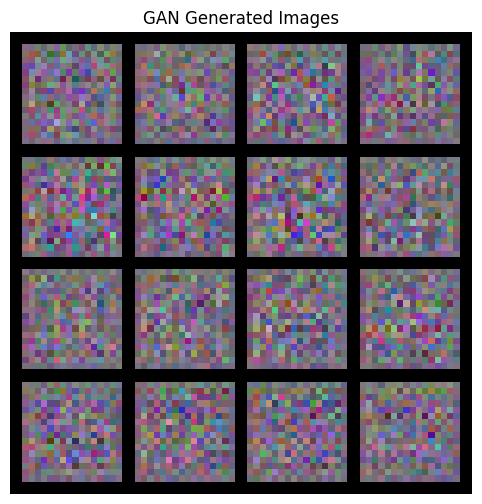

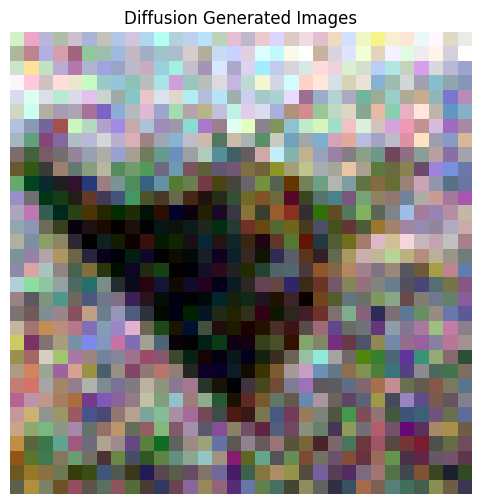

In [7]:
# Generate 16 images from each model
gan_images = generate_gan_images()             # From GAN
diffusion_images = generate_diffusion_images() # From DDPM

# Display results side by side
show_images(gan_images, "GAN Generated Images")
show_images(diffusion_images, "Diffusion Generated Images")


In [15]:
# Install required libraries for metrics
!pip install -q torchmetrics pytorch-fid
!pip install torch-fidelity
!pip install --upgrade torchmetrics torch-fidelity



In [16]:
# Define evaluation function for a batch of images
def evaluate_generated_images(images, real_images):
    # Normalize fake and real images to [0, 1] range
    images = (images + 1) / 2.0
    real_images = (real_images + 1) / 2.0

    # Resize to 299x299 for Inception network input
    images = torch.nn.functional.interpolate(images, size=(299, 299), mode='bilinear')
    real_images = torch.nn.functional.interpolate(real_images, size=(299, 299), mode='bilinear')

    # Feed both to FID
    fid.update(real_images, real=True)
    fid.update(images, real=False)

    # Inception Score expects only generated images
    iscore.update(images)

    # Return computed scores
    return fid.compute().item(), iscore.compute()[0].item()


In [22]:
!pip install nbstripout
!nbstripout ganvsdiffusion.ipynb

Could not strip 'ganvsdiffusion.ipynb': file not found
